In [33]:
import numpy as np
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\K.MANORATH
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
df = pd.read_csv('spam_ham_dataset.csv')
df['text'] = df['text'].apply(lambda x: x.replace('\r\n',' '))
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291 thi...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see at...",0
2,3624,ham,"Subject: neon retreat ho ho ho , we ' re aroun...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs this deal is to b...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft the transport vo...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms hpl c...,0
5168,2933,ham,Subject: calpine daily gas nomination > > juli...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [36]:
df.shape

(5171, 4)

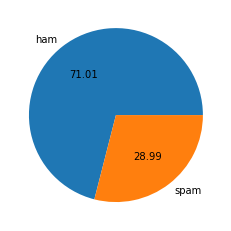

In [37]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [38]:
# tranform function for text

import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stopwords_set = set(stopwords.words('english'))

def transform_text(text):
    #lowering the text
    text = text.lower()
    #removing punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.split()
    #stemming the words
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    #joing the words into a string
    text = ' '.join(text)
    return text



In [39]:
# getting x and y datasets
transformed_texts = []
y = df.label_num
for i in range(len(df)):
    transformed_texts.append(transform_text(df['text'].iloc[i]))

In [40]:
#Vectorizing the transformed_texts 

vectorizer = CountVectorizer()

x = vectorizer.fit_transform(transformed_texts).toarray()
x

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
#splitting datasets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [42]:
#Implementing Random Forest 
rfc = RandomForestClassifier(n_jobs=-1)
# rfc = RandomForestClassifier(n_estimators=50 ,random_state=2)

rfc.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [43]:
#calculating accuracy_score and precision_score for Random Forest model
rfc.score(x_test,y_test)
y_pred = rfc.predict(x_test)
acc_rfc = accuracy_score(y_test,y_pred)
prec_rfc = precision_score(y_test,y_pred)

In [44]:
#Implementing Multinomial Naive_bayes
mnb = MultinomialNB()

mnb.fit(x_train,y_train)

MultinomialNB()

In [45]:
#calculating accuracy_score and precision_score for Multinomial Naive_bayes model
mnb.score(x_test,y_test)
y_pred = mnb.predict(x_test)
acc_mnb = accuracy_score(y_test,y_pred)
prec_mnb = precision_score(y_test,y_pred)

In [46]:
#Plotting accuracy and precision for Random Forest and Multinomial Naive_bayes

performance_df = pd.DataFrame({'Algorithm':['Random Forest','Multinomial Naive_bayes'],'Accuracy':[acc_rfc,acc_mnb],'Precision':[prec_rfc,prec_mnb]})
performance_df

,Algorithm,Accuracy,Precision
0,Random Forest,0.978744,0.964169
1,Multinomial Naive_bayes,0.988406,0.974277


In [47]:
#Using the mnb model as it has higher accuracy and precision
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('mnb_model.pkl', 'wb'))